In [1]:
#Import of necessary modules, including own created functions for the project 2
import numpy as np
import pandas as pd
import math as m
import random as ra
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
#Functions created for this project in other python files
from methods import D_matrix, FrankeFunction, MSE, plot_trade, SGD, plot_heatmap, Accuracy, encoder, decoder
from nn import NeuralNetwork, Logistic_Regression


<h2>Part A<h2>

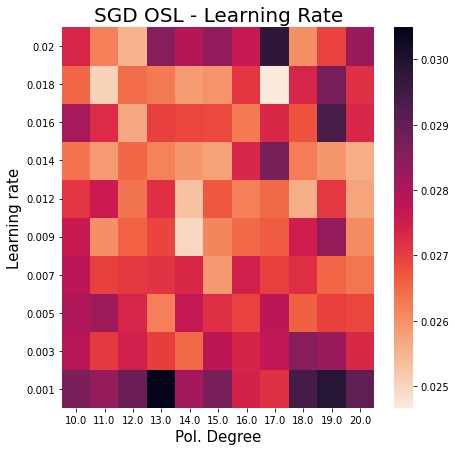

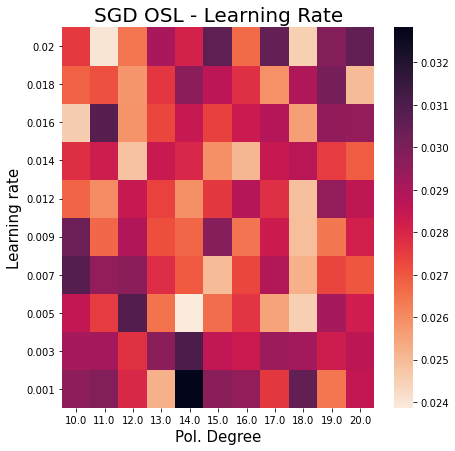

In [44]:
#OLS WITH THE STOCHASTIC GRADIENT DESCENT (LEARNING RATE VARIABLE).
#Defining parameters
degree_i, degree_f = 10, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
epochs = 1000
s_batch = 1
#learning = np.logspace(-12,-3,10)
learning = np.linspace(0.001,0.02,10)
mtr_MSE = []
mer_MSE = []

#Varying degrees agains learnign rates
for deg in degrees:
    er1_MSE = []
    tr1_MSE = []
    for ler in learning:
        #Design matrix
        Xm, Z = D_matrix(0.02, int(deg))
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
        B0 = np.random.random((len(Xm[0]),1))
        #calculating the coefficients for the polynomials
        beta = SGD(B0, X_train, Z_train, epochs, batch_size=s_batch, method='stochastic', lr=ler)
        #predicting values
        Z_model = X_test @ beta
        Ztr_model = X_train @ beta
        #saving performance error
        tr1_MSE.append(MSE(Z_train, Ztr_model))
        er1_MSE.append(MSE(Z_test, Z_model))
    mtr_MSE.append(tr1_MSE)
    mer_MSE.append(er1_MSE)
#plots
plot_heatmap(matrix=np.array(mtr_MSE), Title='SGD OSL - Learning Rate', X_label='Pol. Degree', Y_label='Learning rate', x_values=degrees, y_values=np.round(learning,3), fig_name='SGD_OSL_lr_train.png')
plot_heatmap(matrix=np.array(mer_MSE), Title='SGD OSL - Learning Rate', X_label='Pol. Degree', Y_label='Learning rate', x_values=degrees, y_values=np.round(learning,3), fig_name='SGD_OSL_lr_test.png')

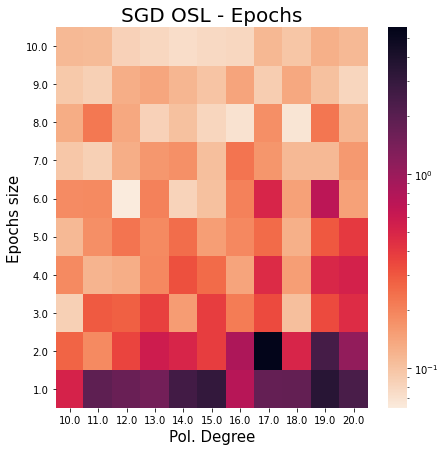

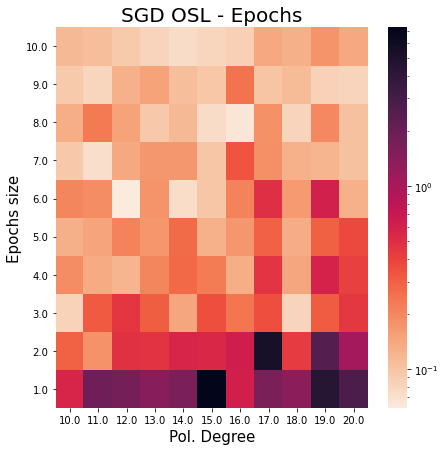

In [6]:
#OLS WITH THE STOCHASTIC GRADIENT DESCENT (EPOCHS VARIABLE).
#Defining parameters
degree_i, degree_f = 10, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
epochs = np.linspace(1,10,10)
s_batch = 1
#learning = np.logspace(-12,-3,10)
ler = 0.01
#learning = np.linspace(0.001,0.02,20)
mtr_MSE = []
mer_MSE = []

#Varying polynomial degree agains epochs (number of iterations).
for deg in degrees:
    er1_MSE = []
    tr1_MSE = []
    for epoch in epochs:
        #Design matrix
        Xm, Z = D_matrix(0.02, int(deg))
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
        B0 = np.random.random((len(Xm[0]),1))
        #getting the coefficients of the polynomes
        beta = SGD(B0, X_train, Z_train, int(epoch), batch_size=s_batch, method='stochastic', lr=ler)
        #predicting values
        Z_model = X_test @ beta
        Ztr_model = X_train @ beta
        #saving performance error
        tr1_MSE.append(MSE(Z_train, Ztr_model))
        er1_MSE.append(MSE(Z_test, Z_model))
    mtr_MSE.append(tr1_MSE)
    mer_MSE.append(er1_MSE)

#Train and Test plots
plot_heatmap(matrix=np.array(mtr_MSE), Title='SGD OSL - Epochs', X_label='Pol. Degree', Y_label='Epochs size', x_values=degrees, y_values=np.round(epochs,0), log_scale=True, fig_name='SGD_OSL_epochs_train.png')
plot_heatmap(matrix=np.array(mer_MSE), Title='SGD OSL - Epochs', X_label='Pol. Degree', Y_label='Epochs size', x_values=degrees, y_values=np.round(epochs,0), log_scale=True, fig_name='SGD_OSL_epochs_test.png')

In [2]:
#OLS WITH THE STOCHASTIC GRADIENT DESCENT (MINI-BATCH VARIABLE).
#Defining parameters
degree_i, degree_f = 10, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
epochs = 1000
#mini-batch sizes
s_batch = np.linspace(1,1000,10)
#learning = np.logspace(-12,-3,10)
ler = 0.01
#learning = np.linspace(0.001,0.02,20)
mtr_MSE = []
mer_MSE = []

#Varying the polynomial degrees agains the mini-batch sizes
for deg in degrees:
    er1_MSE = []
    tr1_MSE = []
    for batches in s_batch:
        #Design Matrix
        Xm, Z = D_matrix(0.02, int(deg))
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
        B0 = np.random.random((len(Xm[0]),1))
        #coefficient of the polynomials
        beta = SGD(B0, X_train, Z_train, int(epochs), batch_size=int(batches), method='stochastic', lr=ler)
        #predictions
        Z_model = X_test @ beta
        Ztr_model = X_train @ beta
        #saving performance error
        tr1_MSE.append(MSE(Z_train, Ztr_model))
        er1_MSE.append(MSE(Z_test, Z_model))
    mtr_MSE.append(tr1_MSE)
    mer_MSE.append(er1_MSE)

#Train and Test plots
plot_heatmap(matrix=np.array(mtr_MSE), Title='SGD OSL - MiniBatch size', X_label='Pol. Degree', Y_label='Mini Batch size', x_values=degrees, y_values=np.round(s_batch,0), fig_name='SGD_OSL_batch_train.png')
plot_heatmap(matrix=np.array(mer_MSE), Title='SGD OSL - MiniBatch size', X_label='Pol. Degree', Y_label='Mini Batch size', x_values=degrees, y_values=np.round(s_batch,0), fig_name='SGD_OSL_batch_train.png')

/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/methods.py:102: RuntimeWarning: overflow encountered in matmul
  G = Xi.T @ (Xi @ B0 - Yi)
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/methods.py:102: RuntimeWarning: invalid value encountered in matmul
  G = Xi.T @ (Xi @ B0 - Yi)
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/methods.py:104: RuntimeWarning: invalid value encountered in subtract
  B0 = B0 - lr*G


KeyboardInterrupt: 

[0, 2, 9, 3, 1]

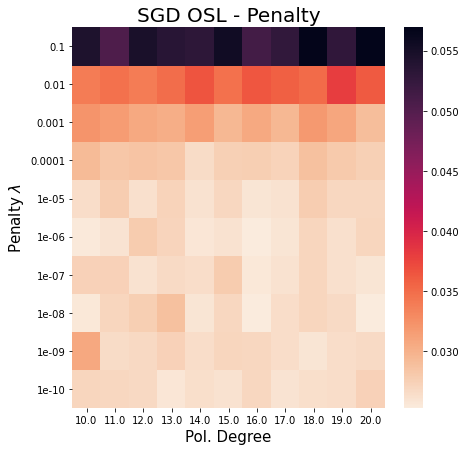

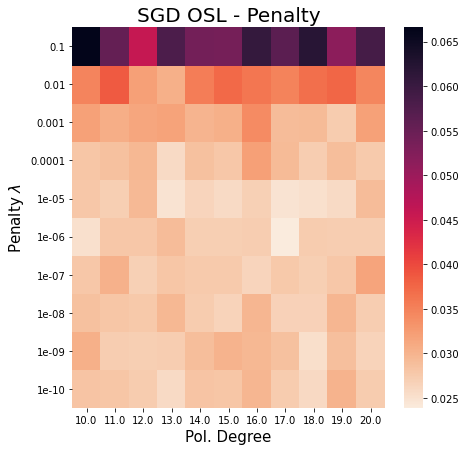

In [2]:
#OLS WITH THE STOCHASTIC GRADIENT DESCENT (PENALTY VARIABLE).
#Definign parameters
degree_i, degree_f = 10, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#epochs = np.linspace(1,10,10)
epoch = 1000
s_batch = 1
#Penalty parameters
penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-12,-3,10)
ler = 0.01
#learning = np.linspace(0.001,0.02,20)
mtr_MSE = []
mer_MSE = []

#Varying polynomial degree agains penalty parameters
for deg in degrees:
    er1_MSE = []
    tr1_MSE = []
    for lambd in penalty:
        #Design matrix
        Xm, Z = D_matrix(0.02, int(deg))
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
        B0 = np.random.random((len(Xm[0]),1))
        #coefficients of the polynomes
        beta = SGD(B0, X_train, Z_train, int(epoch), batch_size=s_batch, method='stochastic', lr=ler, penalty=lambd)
        #predict
        Z_model = X_test @ beta
        Ztr_model = X_train @ beta
        #saving performance error
        tr1_MSE.append(MSE(Z_train, Ztr_model))
        er1_MSE.append(MSE(Z_test, Z_model))
    mtr_MSE.append(tr1_MSE)
    mer_MSE.append(er1_MSE)

#Train and Test plots
plot_heatmap(matrix=np.array(mtr_MSE), Title='SGD OSL - Penalty', X_label='Pol. Degree', Y_label='Penalty $\lambda$', x_values=degrees, y_values=penalty, fig_name='SGD_OSL_penalty_train.png')
plot_heatmap(matrix=np.array(mer_MSE), Title='SGD OSL - Penalty', X_label='Pol. Degree', Y_label='Penalty $\lambda$', x_values=degrees, y_values=penalty, fig_name='SGD_OSL_penalty_test.png')

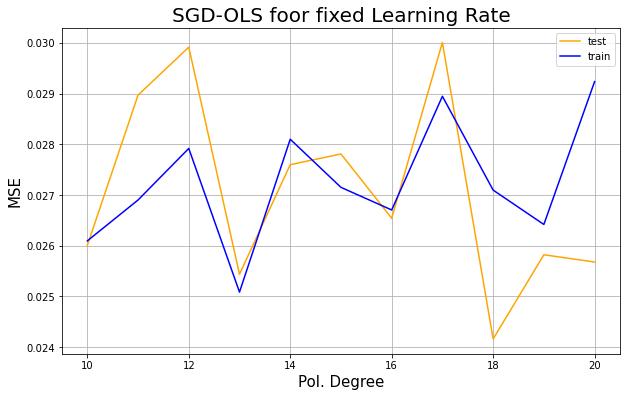

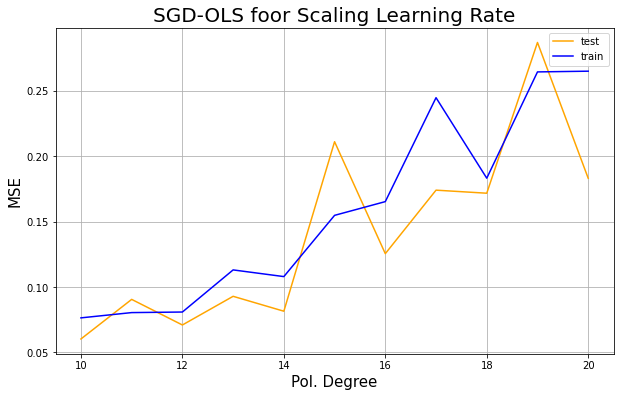

In [19]:
#OLS WITH THE STOCHASTIC GRADIENT DESCENT (Learning Rate variable VS Non Variable).
degree_i, degree_f = 10, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#epochs = np.linspace(1,10,10)
epoch = 1000
s_batch = 1
penalty = 0.0
#learning = np.logspace(-12,-3,10)
ler = 0.014
#learning = np.linspace(0.001,0.02,20)
non_tr_MSE = []
non_er_MSE = []
var_tr_MSE = []
var_er_MSE = []
 
for deg in degrees:
    Xm, Z = D_matrix(0.02, int(deg))
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    B0 = np.random.random((len(Xm[0]),1))
    #adding the confidence intervals
    beta_non = SGD(B0, X_train, Z_train, int(epoch), batch_size=s_batch, method='stochastic', lr=ler)
    beta_var = SGD(B0, X_train, Z_train, int(epoch), batch_size=s_batch, method='stochastic')
    #generating based on the model predictions with the train data set and the test dataset
    Z_model_non = X_test @ beta_non
    Ztr_model_non = X_train @ beta_non
    Z_model_var = X_test @ beta_var
    Ztr_model_var = X_train @ beta_var
    #saving performance error
    non_tr_MSE.append(MSE(Z_train, Ztr_model_non))
    non_er_MSE.append(MSE(Z_test, Z_model_non))
    var_tr_MSE.append(MSE(Z_train, Ztr_model_var))
    var_er_MSE.append(MSE(Z_test, Z_model_var))

#Train and Test plots
plot_trade(er_v=non_er_MSE, tr_v=non_tr_MSE, x_values=degrees, y_label='MSE', x_label='Pol. Degree', title='SGD-OLS foor fixed Learning Rate', yscale=None, xscale=None, fig_name='SGD_fixed_lr.png')
plot_trade(er_v=var_er_MSE, tr_v=var_tr_MSE, x_values=degrees, y_label='MSE', x_label='Pol. Degree', title='SGD-OLS foor Scaling Learning Rate', yscale=None, xscale=None, fig_name='SGD_scaled_lr.png')

<h2>Part B<h2>

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


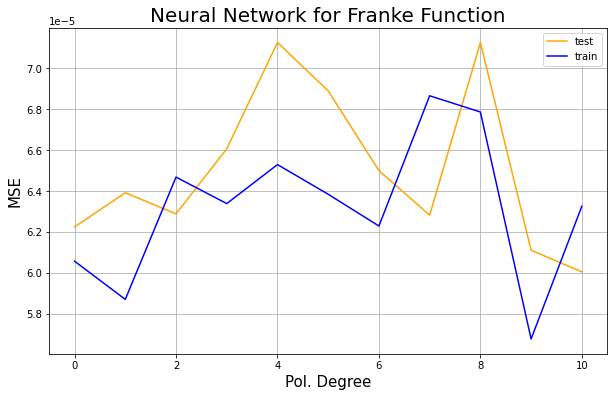

In [2]:
#NEURAL NETWORK BASIC IMPLEMENTATION
#Parameters
degree_i, degree_f = 0, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
epoches = 100
learning_rate = 0.014
lamb = 0.0
#Architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

tr_MSE = []
er_MSE = []
 
#Varying degrees    
for deg in degrees:
    #Design matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #Initializing the neural network
    neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=epoches, lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=False)
    #train
    neural.train()
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test,Z_model))
    print(deg)
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=degrees, y_label='MSE', x_label='Pol. Degree', title='Neural Network for Franke Function', yscale=None, xscale=None, fig_name='nn_franke.png')

In [94]:
#Method for making a Keras Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
#The above taken from Week 41, Morten's presentations

#Function for initializing the Keras Neural Network (TensorFlow).
#Inputs:
    #- Variables for initializing the neural netwrok such as hidden layers, categories, regularization parameters, activation function, probability calculation at the end, learning rate.
#Outputs:
    #- A Sequential network class initialized with the specifications.
def Keras_NN(hidden_layers, out_layer, learning, regul=0.0, act_func='relu', proba=True):
    net = Sequential()
    for item in hidden_layers:
        net.add(Dense(item, activation=act_func, kernel_regularizer=regularizers.l2(regul)))
    if proba == True:
        net.add(Dense(out_layer, activation='softmax'))
    else:
        net.add(Dense(out_layer, activation='linear'))
    sgd = optimizers.SGD(lr=learning)
    net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return net

In [2]:
#NEURAL NETWORK FORM KERAS IMPLEMENTATION
#Parameters
degree_i, degree_f = 0, 20
degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
epoches = 100
learning_rate = 0.014
lamb = 0.0
#Architecture parameters
nodes = [10, 10 ,10]
nodes_out = 1

tr_MSE = []
er_MSE = []
 
for deg in degrees:
    #Design Matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #Z_train, Z_test = Z_train.reshape(len(Z_train)), Z_test.reshape(len(Z_test))
    #initializing neural network from Keras
    neural = Keras_NN(hidden_layers=nodes, out_layer=nodes_out, learning=learning_rate, act_func='sigmoid', proba=False)
    #train
    neural.fit(X_train, Z_train, epochs=epoches, verbose=0)
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Z_test)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test,Z_model))
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=degrees, y_label='MSE', x_label='Pol. Degree', title='Neural Network for Franke Function', yscale=None, xscale=None, fig_name='nn_keras_franke.png')

NameError: name 'Keras_NN' is not defined

/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:45: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


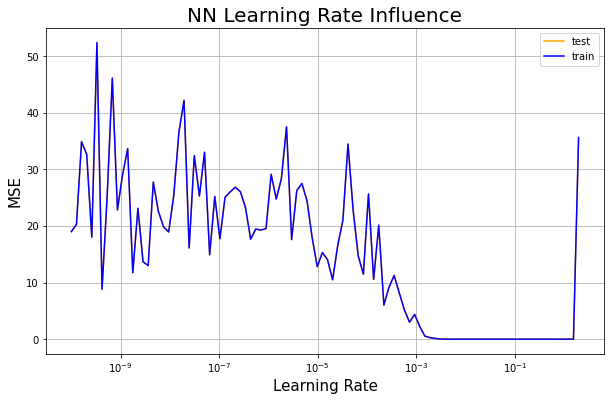

In [12]:
#LEARNING RATE WITH OWN NEURAL NETWORK
#Parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
penalty = np.logspace(-10,-1,10)
learning = np.logspace(-10,0.2934,100)
epoches = 100
deg = 1 #X and Y columns, no more
#learning_rate = 0.014
lamb = 0.0
#Architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

tr_MSE = []
er_MSE = []

#Varying the learning rate
for learning_rate in learning:
    #Design Matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #Initializing Neural Network
    neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=epoches, lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=False)
    #train
    neural.train()
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test, Z_model))
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=learning, y_label='MSE', x_label='Learning Rate', title='Learning Rate Influence', yscale=None, xscale='log', fig_name='ffnn_lr.png')

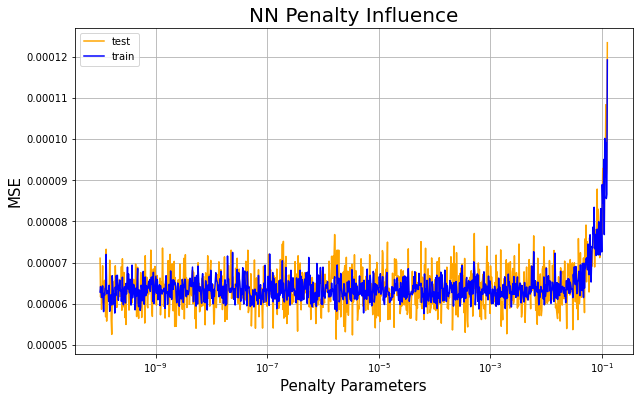

In [13]:
#REGULARIZATION PARAMETERS WITH OWN NEURAL NETWORK
#Parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
penalty = np.logspace(-10,-0.9,1000)
#learning = np.logspace(-10,0.293,1000)
epoches = 100
deg = 1 #X and Y columns, no more
learning_rate = 0.014
#lamb = 0.0
#Architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

tr_MSE = []
er_MSE = []
 
#Varying penalty parameters    
for lamb in penalty:
    #Design Matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #Initializing neural network
    neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=epoches, lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=False)
    #train
    neural.train()
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test, Z_model))
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=penalty, y_label='MSE', x_label='Penalty Parameters', title='NN Penalty Influence', yscale=None, xscale='log', fig_name='ffnn_penalty.png')

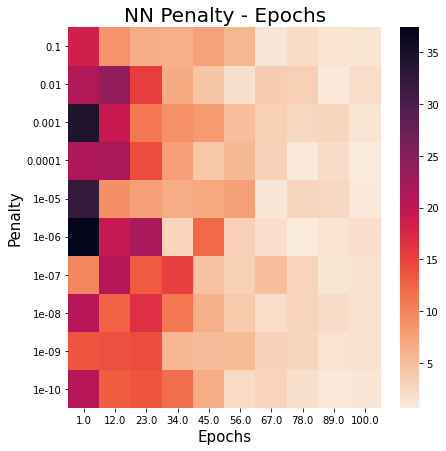

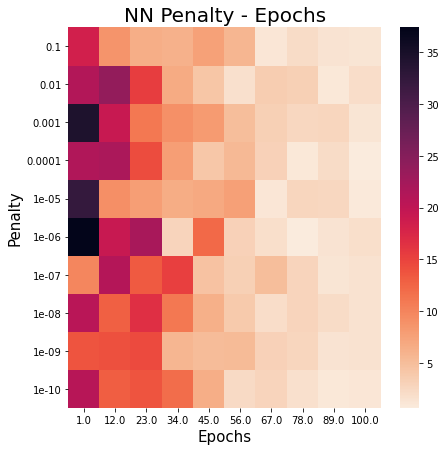

In [6]:
#EPOCH VS PENALTY PARAMETERS FOR OUR OWN NN
#Parameters
penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.293,10)
#epoches = 100
epoches = np.linspace(1,100,10)
deg = 1 #X and Y columns, no more
learning_rate = 0.0014
#lamb = 0.0
#achitecture parameters
nodes = [10, 10, 10]
nodes_out = 1

mtr_MSE = []
mer_MSE = []

#varying epochs agains penalty values
for epoch in epoches:
    tr_MSE = []
    er_MSE = []
    for lamb in penalty:
        #doing the polynomial fit by using the Moore-Penrose matrix inversion
        Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
        #initializing neural network
        neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=False)
        #train
        neural.train()
        #predict
        Z_model = neural.predict(X_test)
        Ztr_model = neural.predict(X_train)
        #print(Z_model, Ztr_model)
        #saving performance error
        tr_MSE.append(MSE(Z_train, Ztr_model))
        er_MSE.append(MSE(Z_test, Z_model))
    mtr_MSE.append(tr_MSE)
    mer_MSE.append(er_MSE)
    
plot_heatmap(matrix=np.array(mtr_MSE), Title='NN Penalty - Epochs', X_label='Epochs', Y_label='Penalty', x_values=np.round(epoches,0), y_values=penalty, log_scale=False, fig_name='NN_lambda_epochs_train.png')
plot_heatmap(matrix=np.array(mer_MSE), Title='NN Penalty - Epochs', X_label='Epochs', Y_label='Penalty', x_values=np.round(epoches,0), y_values=penalty, log_scale=False, fig_name='NN_lambda_epochs_test.png')

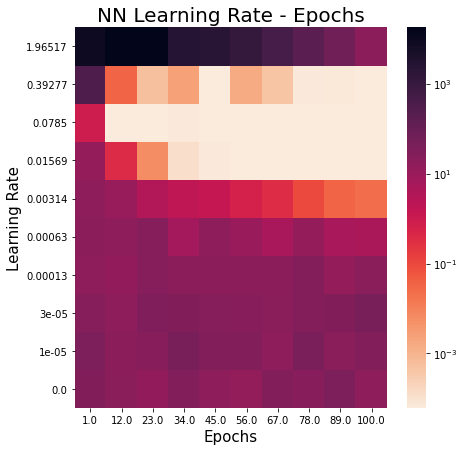

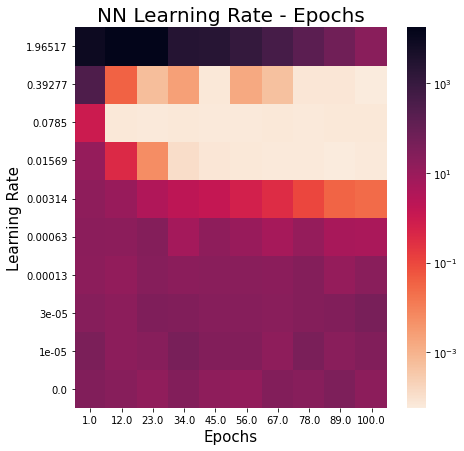

In [11]:
#EPOCH VS LEARNING RATES PARAMETERS FOR OUR OWN NN
#parameters
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.293,10)
#epoches = 100
epoches = np.linspace(1,100,10)
deg = 1 #X and Y columns, no more
#learning_rate = 0.0014
learning = np.logspace(-6,0.2934,10)
lamb = 0.0
#architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

mtr_MSE = []
mer_MSE = []

#Varying epochs agains learning rates
for epoch in epoches:
    tr_MSE = []
    er_MSE = []
    for learning_rate in learning:
        #Design Matrix
        Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
        #initializing neural network
        neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=False)
        #train
        neural.train()
        #predict
        Z_model = neural.predict(X_test)
        Ztr_model = neural.predict(X_train)
        #print(Z_model, Ztr_model)
        #saving performance error
        tr_MSE.append(MSE(Z_train, Ztr_model))
        er_MSE.append(MSE(Z_test, Z_model))
    mtr_MSE.append(tr_MSE)
    mer_MSE.append(er_MSE)
    
plot_heatmap(matrix=np.array(mtr_MSE), Title='NN Learning Rate - Epochs', X_label='Epochs', Y_label='Learning Rate', x_values=np.round(epoches,0), y_values=np.round(learning, 5), log_scale=True, fig_name='NN_lr_epochs_train.png')
plot_heatmap(matrix=np.array(mer_MSE), Title='NN Learning Rate - Epochs', X_label='Epochs', Y_label='Learning Rate', x_values=np.round(epoches,0), y_values=np.round(learning, 5), log_scale=True, fig_name='NN_lr_epochs_test.png')

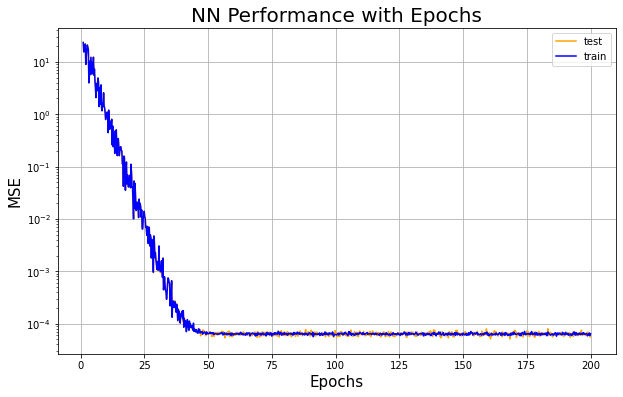

In [14]:
#EPOCHS WITH OWN NEURAL NETWORK
#Parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,200,1000)
deg = 1 #X and Y columns, no more
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

tr_MSE = []
er_MSE = []
 
for epoch in epoches:
    #Design matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #initializing neural network
    neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=False)
    #train
    neural.train()
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test, Z_model))
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=epoches, y_label='MSE', x_label='Epochs', title='NN Performance with Epochs', yscale='log', xscale=None, fig_name='ffnn_epoch.png')

<h2>Part C<h2>
<h4>The cell above also can make part of this Part (C) since it was made using the Sigmoid Activation function.<h4>

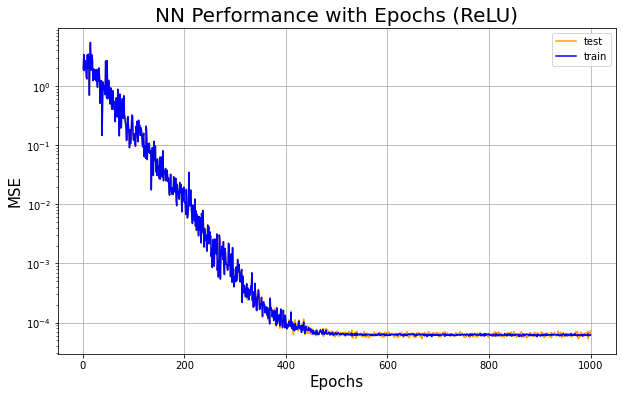

In [2]:
#EPOCHS WITH OWN NEURAL NETWORK (RELU ACT_FUNCTION)
#parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,1000,1000)
deg = 1 #X and Y columns, no more
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

tr_MSE = []
er_MSE = []
 
for epoch in epoches:
    #ddesign matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #initializing neural network
    neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='relu', penalty=lamb, prob=False)
    #train
    neural.train()
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test, Z_model))
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=epoches, y_label='MSE', x_label='Epochs', title='NN Performance with Epochs (ReLU)', yscale='log', xscale=None, fig_name='ffnn_epoch_relu.png')

/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:153: RuntimeWarning: overflow encountered in matmul
  Z['Z'+str(i+1)] = A['A'+str(i)] @ W['W'+str(i)] + B['B'+str(i)]
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:175: RuntimeWarning: invalid value encountered in matmul
  dW['dW'+str(i)] = (1/m) * X.T @ delta
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:146: RuntimeWarning: invalid value encountered in matmul
  Z['Z'+str(i+1)] = A['A'+str(i)] @ W['W'+str(i)] + B['B'+str(i)]
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:171: RuntimeWarning: overflow encountered in matmul
  dW['dW'+str(i)] = (1/m) * A['A'+str(i)].T @ delta
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:179: RuntimeWarning: overflow encountered in matmul
  dW['dW'+str(i)] = (1/m) * A['A'+str(i)].T @ delta
/uio/hume/student-u49/sergioad/pc/Dokumenter/FYS-STK/project2/nn.py:174: RuntimeWarning: overflow encountered in m

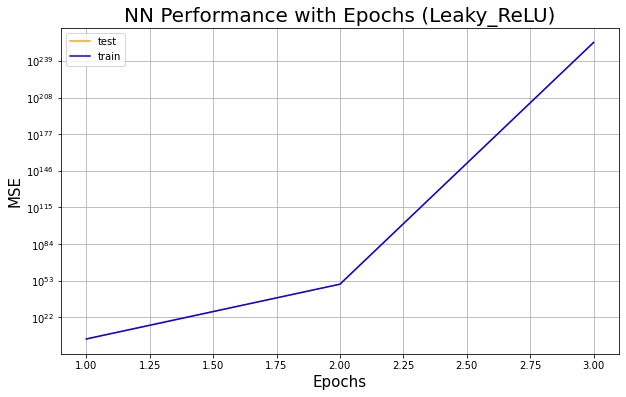

In [2]:
#EPOCHS WITH OWN NEURAL NETWORK (LEAKY RELU ACT_FUNCTION)
#parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,1000,1000)
deg = 1 #X and Y columns, no more
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [10, 10, 10]
nodes_out = 1

tr_MSE = []
er_MSE = []
 
for epoch in epoches:
    #Deign matrix
    Xm, Z = D_matrix(0.02, int(deg), noise=True, Z_normalize=True)
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(Xm, Z, test_size=0.2)
    #initializing neural network
    neural = NeuralNetwork(X_input=X_train, Y_input=Z_train, num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='leaky_relu', penalty=lamb, prob=False)
    #train
    neural.train()
    #predict
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_MSE.append(MSE(Z_train, Ztr_model))
    er_MSE.append(MSE(Z_test, Z_model))
    
plot_trade(er_v=er_MSE, tr_v=tr_MSE, x_values=epoches, y_label='MSE', x_label='Epochs', title='NN Performance with Epochs (Leaky_ReLU)', yscale='log', xscale=None, fig_name='ffnn_epoch_leakyrelu.png')

<h2>Part D<h2>

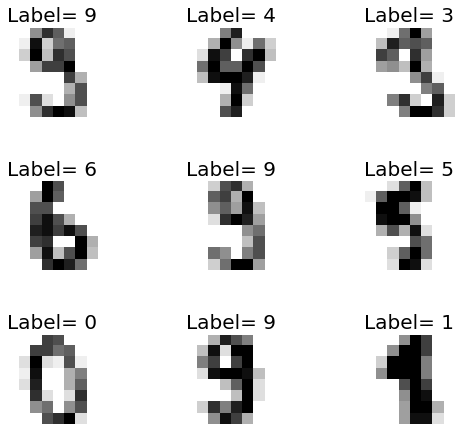

In [13]:
#Import MINST dataset and load it
from sklearn import datasets
digits = datasets.load_digits()
#take images and the label of each image
pixels = digits.images
labels = digits.target

#Taking random samples from the datasets to plot and show in a subplot figure.
random_indices = np.random.choice(np.arange(len(labels)), size=9)

plt.figure(figsize=(8,8))
for i, image in enumerate(pixels[random_indices]):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(wspace=1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label= '+str(labels[random_indices[i]]), fontsize=20)
plt.savefig('figures/minst_dataset.png')

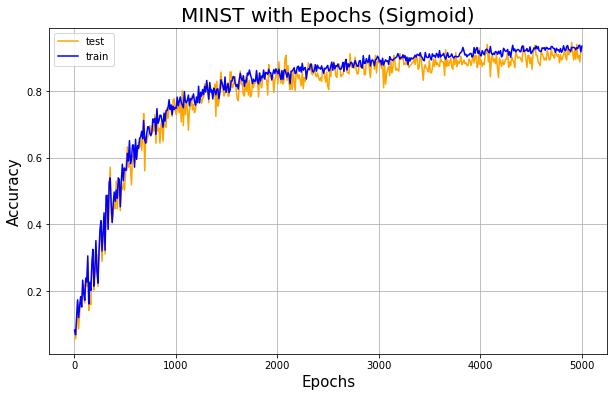

In [18]:
#EPOCHS WITH OWN NEURAL NETWORK FPR MINST DATASET (Sigmoid ACT_FUNCTION)
#parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,5000,500)
#epoches = [1000]
learning_rate = 0.014
lamb = 0.0
#architecture parameterrs
nodes = [50]
nodes_out = 10

tr_acc = []
er_acc = []
inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
#inputs = (inputs - np.mean(inputs))/ np.var(inputs)
inputs = (inputs - np.mean(inputs))/ np.std(inputs)
#inputs = inputs / np.max(inputs) #max val of pixels
#Data Normalization
#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
 
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=True)
    neural.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='MINST with Epochs (Sigmoid)', yscale=None, xscale=None, fig_name='minst_epoch_sigmoid.png')

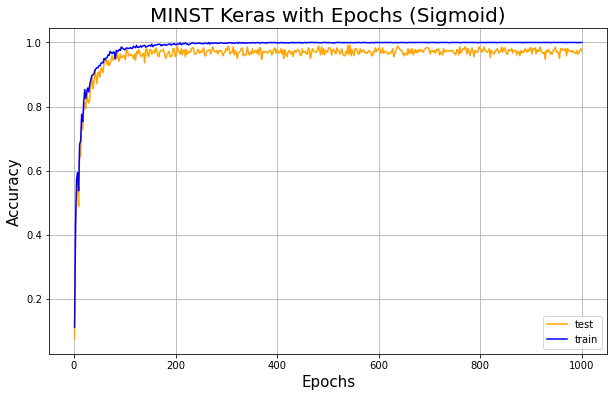

In [37]:
#EPOCHS WITH KERAS NEURAL NETWORK FOR MINST DATASET
#parameters
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,1000,500)
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [50, 50]
nodes_out = 10

tr_acc = []
er_acc = []
inputs = pixels.reshape(len(pixels),-1)
 
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = Keras_NN(hidden_layers=nodes, out_layer=nodes_out, learning=learning_rate, act_func='sigmoid', proba=True)
    neural.fit(X_train, encoder(Z_train), epochs=int(epoch), verbose=0)
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='MINST Keras with Epochs (Sigmoid)', yscale=None, xscale=None, fig_name='minst_keras_epoch_sigmoid.png')

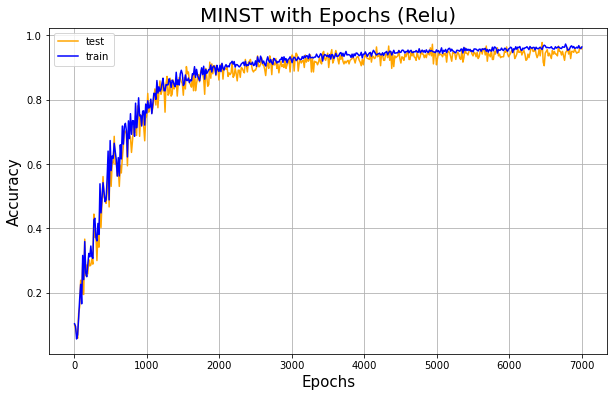

In [38]:
#EPOCHS WITH OWN NEURAL NETWORK FPR MINST DATASET (RELU ACT_FUNCTION)
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,7000,500)
#epoches = [1000]
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [50]
nodes_out = 10

tr_acc = []
er_acc = []
inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
 
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='relu', penalty=lamb, prob=True)
    neural.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='MINST with Epochs (Relu)', yscale=None, xscale=None, fig_name='minst_epoch_relu.png')

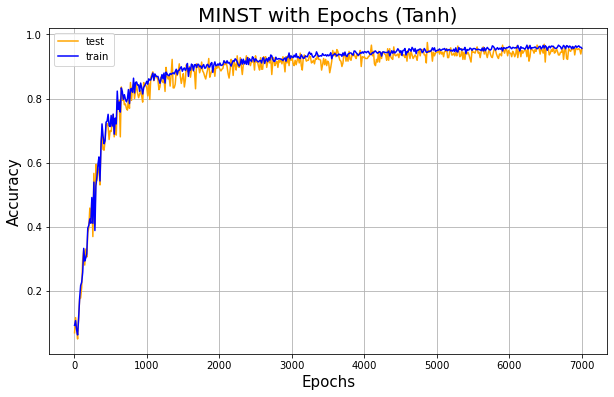

In [39]:
#EPOCHS WITH OWN NEURAL NETWORK FPR MINST DATASET (TANH ACT_FUNCTION)
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,7000,500)
#epoches = [1000]
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [50]
nodes_out = 10

tr_acc = []
er_acc = []
inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
 
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='tanh', penalty=lamb, prob=True)
    neural.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='MINST with Epochs (Tanh)', yscale=None, xscale=None, fig_name='minst_epoch_tanh.png')

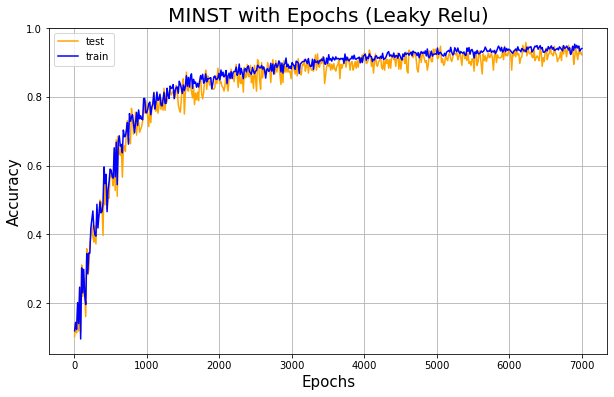

In [40]:
#EPOCHS WITH OWN NEURAL NETWORK FPR MINST DATASET (LEAKY RELU ACT_FUNCTION)
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,7000,500)
#epoches = [1000]
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [50]
nodes_out = 10

tr_acc = []
er_acc = []
inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
 
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='leaky_relu', penalty=lamb, prob=True)
    neural.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='MINST with Epochs (Leaky Relu)', yscale=None, xscale=None, fig_name='minst_epoch_leakyrelu.png')

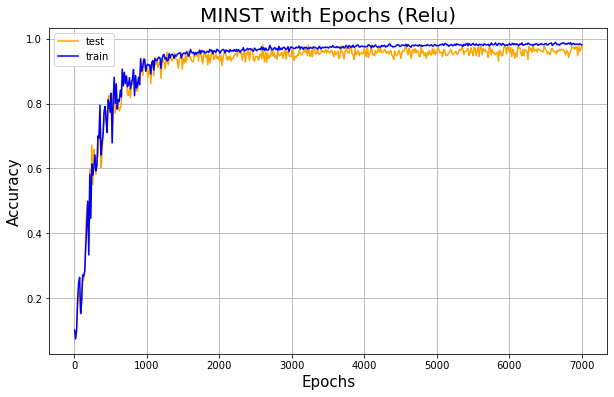

In [41]:
#EPOCHS WITH OWN NEURAL NETWORK FPR MINST DATASET (RELU ACT_FUNCTION)
#degree_i, degree_f = 0, 20
#degrees = np.linspace(degree_i,degree_f,degree_f-degree_i+1)
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.2934,1000)
epoches = np.linspace(1,7000,500)
#epoches = [1000]
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [50]
nodes_out = 10

tr_acc = []
er_acc = []
inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
#inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
 
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='relu', penalty=lamb, prob=True)
    neural.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #print(Z_model, Ztr_model)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='MINST with Epochs (Relu)', yscale=None, xscale=None, fig_name='minst_epoch_normalization_relu.png')

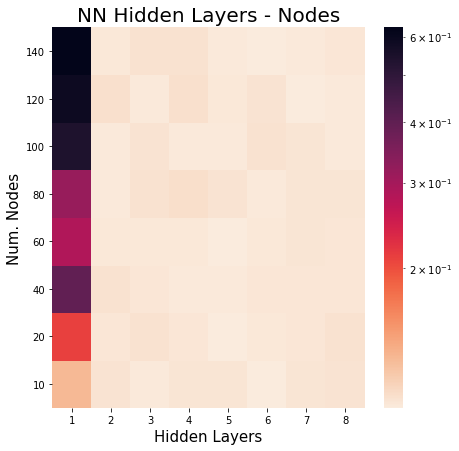

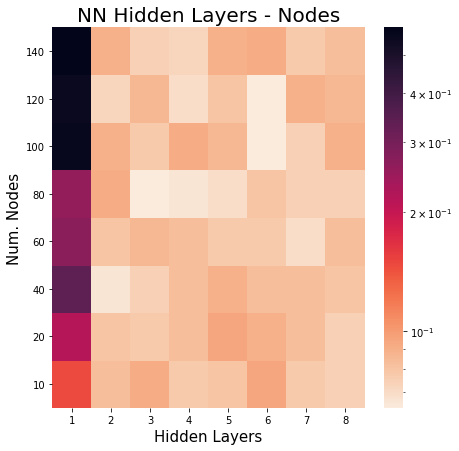

In [42]:
#NODES VS LAYERS PARAMETERS FOR OUR OWN NN
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.293,10)
#epoches = 100
#epoches = np.linspace(1,100,10)
epoch = 6000
deg = 1 #X and Y columns, no more
learning_rate = 0.0014
#learning = np.logspace(-6,0.2934,10)
lamb = 0.0
#Making the layers and nodes parameters to vary
layers = [1,2,3,4,5,6,7,8]
nodes = [10,20,40,60,80,100,120,140]
iterate = []
for lay in layers:
    min_iterate = []
    for n in nodes:
        min_iterate.append([n]*lay)
    iterate.append(min_iterate)
nodes_out = 10

mtr_Acc = []
mer_Acc = []

inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))

for lay in iterate:
    tr_acc = []
    er_acc = []
    for nod in lay:
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
        Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
        neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nod, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='sigmoid', penalty=lamb, prob=True)
        neural.train()
        #generating based on the model predictions with the train data set and the test dataset
        Z_model = neural.predict(X_test)
        Ztr_model = neural.predict(X_train)
        #print(Z_model, Ztr_model)
        #saving performance error
        tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
        er_acc.append(Accuracy(Z_test, decoder(Z_model)))
        #print(epoch)
    mtr_Acc.append(tr_acc)
    mer_Acc.append(er_acc)
        
plot_heatmap(matrix=np.array(mtr_Acc), Title='NN Hidden Layers - Nodes', X_label='Hidden Layers', Y_label='Num. Nodes', x_values=np.round(np.array(layers),0), y_values=np.round(np.array(nodes),0), log_scale=True, fig_name='NN_layers_nodes_train.png')
plot_heatmap(matrix=np.array(mer_Acc), Title='NN Hidden Layers - Nodes', X_label='Hidden Layers', Y_label='Num. Nodes', x_values=np.round(np.array(layers),0), y_values=np.round(np.array(nodes),0), log_scale=True, fig_name='NN_layers_nodes_test.png')

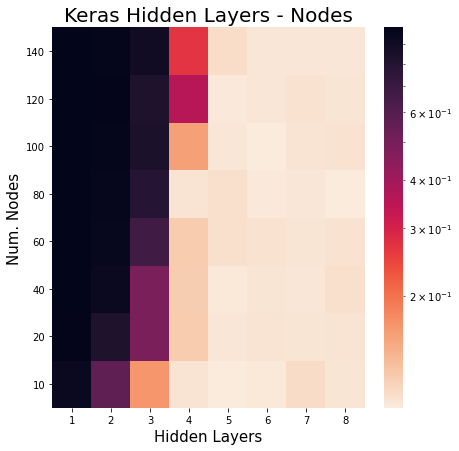

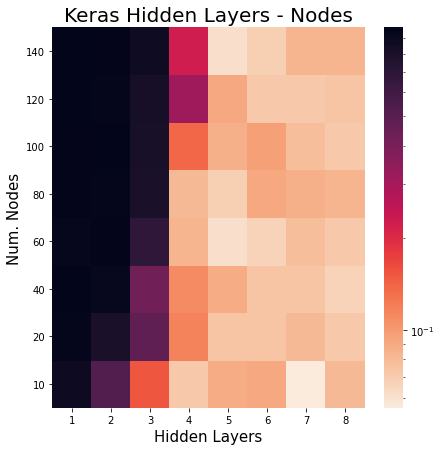

In [43]:
#NODES VS LAYERS PARAMETERS FOR KERAS NN
#penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.293,10)
#epoches = 100
#epoches = np.linspace(1,100,10)
epoch = 600
deg = 1 #X and Y columns, no more
learning_rate = 0.0014
#learning = np.logspace(-6,0.2934,10)
lamb = 0.0
#Making the layers and nodes parameters to vary
layers = [1,2,3,4,5,6,7,8]
nodes = [10,20,40,60,80,100,120,140]
iterate = []
for lay in layers:
    min_iterate = []
    for n in nodes:
        min_iterate.append([n]*lay)
    iterate.append(min_iterate)
nodes_out = 10

mtr_Acc = []
mer_Acc = []

inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
#inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))

for lay in iterate:
    tr_acc = []
    er_acc = []
    for nod in lay:
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(inputs, labels, test_size=0.2)
        Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
        neural = Keras_NN(hidden_layers=nod, out_layer=nodes_out, learning=learning_rate, act_func='sigmoid', proba=True)
        neural.fit(X_train, encoder(Z_train), epochs=int(epoch), verbose=0)
        #generating based on the model predictions with the train data set and the test dataset
        Z_model = neural.predict(X_test)
        Ztr_model = neural.predict(X_train)
        #print(Z_model, Ztr_model)
        #saving performance error
        tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
        er_acc.append(Accuracy(Z_test, decoder(Z_model)))
        #print(epoch)
    mtr_Acc.append(tr_acc)
    mer_Acc.append(er_acc)
        
plot_heatmap(matrix=np.array(mtr_Acc), Title='Keras Hidden Layers - Nodes', X_label='Hidden Layers', Y_label='Num. Nodes', x_values=np.round(np.array(layers),0), y_values=np.round(np.array(nodes),0), log_scale=True, fig_name='Keras_layers_nodes_train.png')
plot_heatmap(matrix=np.array(mer_Acc), Title='Keras Hidden Layers - Nodes', X_label='Hidden Layers', Y_label='Num. Nodes', x_values=np.round(np.array(layers),0), y_values=np.round(np.array(nodes),0), log_scale=True, fig_name='Keras_layers_nodes_test.png')

<h2>Part E<h2>

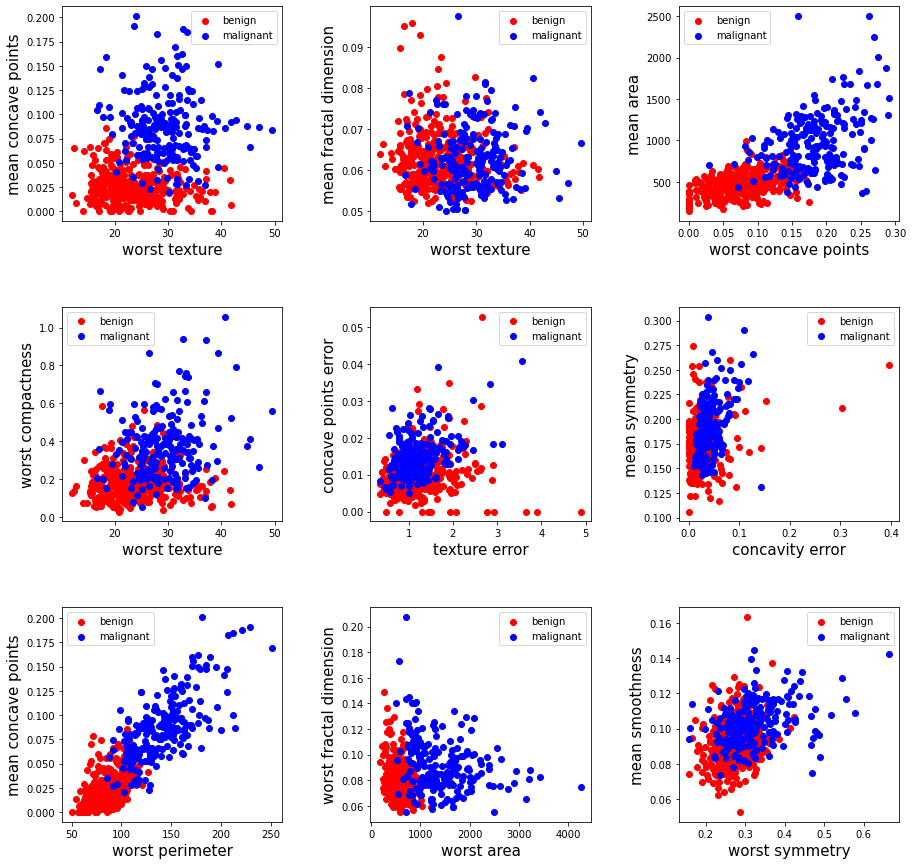

In [2]:
#Breast Cancer datasets
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
inputs_o, targets, features, target_names = breast['data'], breast['target'], breast['feature_names'], breast['target_names']


#Plot of the Breast Cancer data set by selecting random parameters and plotting between them
random_indices = np.random.choice(np.arange(len(inputs_o[0])), size=(9,2))

plt.figure(figsize=(15,15))
for i in range(len(random_indices)):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=0.4)
    plt.scatter( inputs_o[:,random_indices[i,0]][targets == 1], inputs_o[:,random_indices[i,1]][targets == 1], c='red', label=target_names[1])
    plt.scatter( inputs_o[:,random_indices[i,0]][targets == 0], inputs_o[:,random_indices[i,1]][targets == 0], c='blue', label=target_names[0])
    #plt.scatter(inputs[:,random_indices[i,0]], inputs[:,random_indices[i,1]], c=targets)
    plt.legend()
    plt.xlabel(features[random_indices[i,0]],fontsize=15)
    plt.ylabel(features[random_indices[i,1]],fontsize=15)
plt.savefig('figures/cancer_dataset.png')

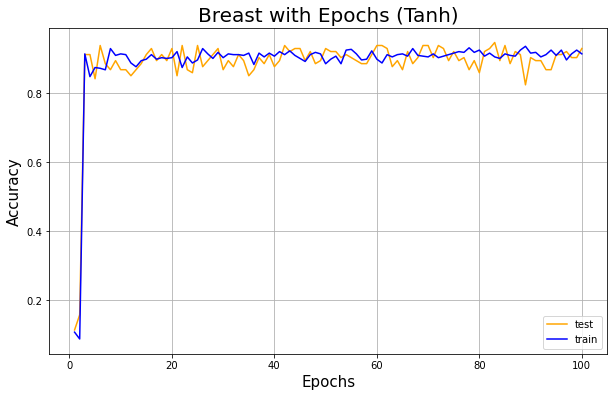

In [227]:
#NN classification for Breast Cancer Dataset
#parameters
epoches = np.linspace(1,100,100)
#epoches = [500]
learning_rate = 0.014
lamb = 0.0
#architecture parameters
nodes = [50]
nodes_out = 2

tr_acc = []
er_acc = []
inputs =  inputs_o
#inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization

#inputs = inputs @ np.max(inputs, axis=0).reshape(len(inputs[0]),1)

#inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
#inputs = (inputs - np.min(inputs, axis=1))/ (np.max(inputs, axis=1) - np.min(inputs, axis=1))
#for ka in range(len(inputs[0])):
#    inputs[:,ka] = (inputs[:,ka] - np.min(inputs[:,ka])) / (np.max(inputs[:,ka]) - np.min(inputs[:,ka]))
    
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, targets, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    neural = NeuralNetwork(X_input=X_train, Y_input=encoder(Z_train), num_nodes=nodes, num_outputs=nodes_out, epochs=int(epoch), lr=learning_rate, act_type='tanh', penalty=lamb, prob=True)
    neural.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = neural.predict(X_test)
    Ztr_model = neural.predict(X_train)
    #saving performance error
    tr_acc.append(Accuracy(Z_train, decoder(Ztr_model)))
    er_acc.append(Accuracy(Z_test, decoder(Z_model)))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='Breast with Epochs (Tanh)', yscale=None, xscale=None, fig_name='breast_epoch_tanh.png')

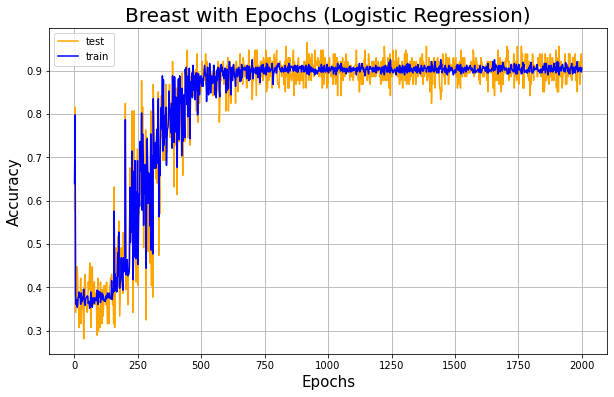

In [6]:
#Logistic Regression for Breast Cancer Dataset.
epoches = np.linspace(1,2000,1000)
#epoches = [2000]
learning_rate = 0.014
lamb = 0.0

tr_acc = []
er_acc = []
inputs =  inputs_o
#inputs = pixels.reshape(len(pixels),-1)
#Data Standarization
#inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization

#inputs = inputs @ np.max(inputs, axis=0).reshape(len(inputs[0]),1)

inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))
#inputs = (inputs - np.min(inputs, axis=1))/ (np.max(inputs, axis=1) - np.min(inputs, axis=1))
#for ka in range(len(inputs[0])):
#    inputs[:,ka] = (inputs[:,ka] - np.min(inputs[:,ka])) / (np.max(inputs[:,ka]) - np.min(inputs[:,ka]))
    
for epoch in epoches:
    #random data_test split
    X_train, X_test, Z_train, Z_test = train_test_split(inputs, targets, test_size=0.2)
    Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
    clas = Logistic_Regression(X_input=X_train, Y_input=Z_train, epochs=int(epoch), lr=learning_rate, penalty=lamb, threshold=0.5)
    clas.train()
    #generating based on the model predictions with the train data set and the test dataset
    Z_model = clas.predict(X_test)
    Ztr_model = clas.predict(X_train)
    #print(Ztr_model[:20], Z_train[:20])
    #saving performance error
    tr_acc.append(Accuracy(Z_train, Ztr_model))
    er_acc.append(Accuracy(Z_test, Z_model))
    #print(epoch)
    
plot_trade(er_v=er_acc, tr_v=tr_acc, x_values=epoches, y_label='Accuracy', x_label='Epochs', title='Breast with Epochs (Logistic Regression)', yscale=None, xscale=None, fig_name='log_breast_epoch.png')

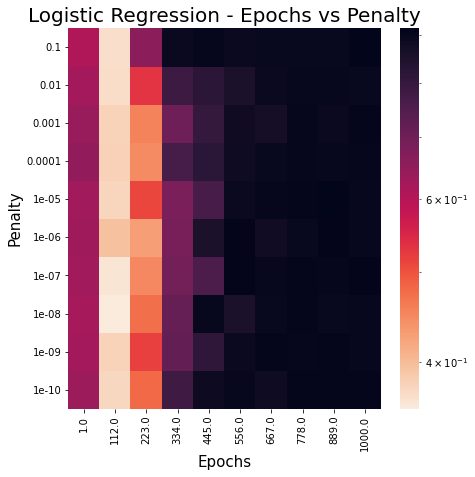

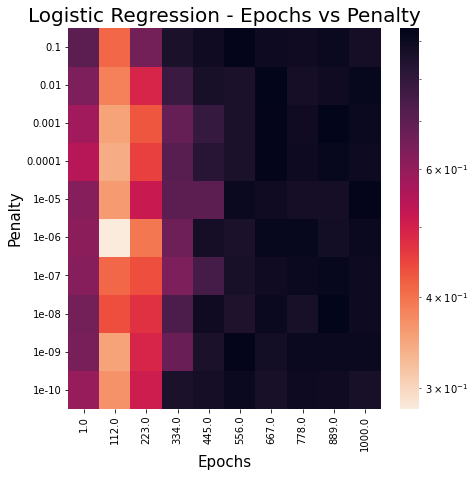

In [6]:
#NODES VS LAYERS PARAMETERS FOR KERAS NN
penalty = np.logspace(-10,-1,10)
#learning = np.logspace(-10,0.293,10)
#epoches = 100
epoches = np.linspace(1,1000,10)
#epoch = 600
#deg = 1 #X and Y columns, no more
learning_rate = 0.014
#learning = np.logspace(-6,0.2934,10)
#lamb = 0.0
#Making the layers and nodes parameters to vary

mtr_Acc = []
mer_Acc = []

inputs = inputs_o
#Data Standarization
#inputs = (inputs - np.mean(inputs))/ np.var(inputs)
#Data Normalization
inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs))

for epoch in epoches:
    tr_acc = []
    er_acc = []
    for lamb in penalty:
        #random data_test split
        X_train, X_test, Z_train, Z_test = train_test_split(inputs, targets, test_size=0.2)
        Z_train, Z_test = Z_train.reshape(len(Z_train),1), Z_test.reshape(len(Z_test),1)
        clas = Logistic_Regression(X_input=X_train, Y_input=Z_train, epochs=int(epoch), lr=learning_rate, penalty=lamb, threshold=0.5)
        clas.train()
        #generating based on the model predictions with the train data set and the test dataset
        Z_model = clas.predict(X_test)
        Ztr_model = clas.predict(X_train)
        #print(Ztr_model[:20], Z_train[:20])
        #saving performance error
        tr_acc.append(Accuracy(Z_train, Ztr_model))
        er_acc.append(Accuracy(Z_test, Z_model))
        #print(epoch)
    mtr_Acc.append(tr_acc)
    mer_Acc.append(er_acc)
        
plot_heatmap(matrix=np.array(mtr_Acc), Title='Logistic Regression - Epochs vs Penalty', X_label='Epochs', Y_label='Penalty', x_values=np.round(epoches,0), y_values=penalty, log_scale=True, fig_name='logic_epoch_penalty_train.png')
plot_heatmap(matrix=np.array(mer_Acc), Title='Logistic Regression - Epochs vs Penalty', X_label='Epochs', Y_label='Penalty', x_values=np.round(epoches,0), y_values=penalty, log_scale=True, fig_name='logic_epoch_penalty_test.png')